In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
keras.__version__

'2.9.0'

In [5]:
tf.__version__

'2.9.1'

In [6]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

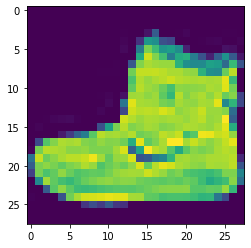

In [7]:
plt.imshow(x_train[0])

In [8]:
y_train[0]

9

# data normalization

In [9]:
x_train=x_train/255
x_test=x_test/255

# splitting data into train,valid,test

In [35]:
x_train.shape,y_train.shape

((55000, 28, 28), (55000,))

In [11]:
x_valid,x_train=x_train[:5000],x_train[5000:]
y_valid,y_train=y_train[:5000],y_train[5000:]

# set random seed

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

# model building

In [13]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 10)                3010      
                                                                 
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [15]:
x_train.shape[0]

55000

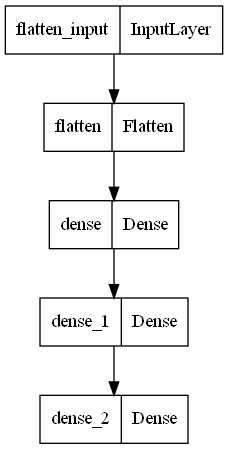

In [16]:
import pydot
keras.utils.plot_model(model)

In [17]:
weights,biases=model.layers[1].get_weights()

In [18]:
weights,biases

(array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
          0.03859074, -0.06889391],
        [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
         -0.02763776, -0.04165364],
        [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
          0.07121518, -0.07331658],
        ...,
        [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
          0.00228987,  0.05581069],
        [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
          0.00034875,  0.02878492],
        [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
          0.00272203, -0.06793761]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

# compile and evaluating the model

In [19]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [20]:
model_history=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.7331 - accuracy: 0.7602 - val_loss: 0.5295 - val_accuracy: 0.8178
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4914 - accuracy: 0.8279 - val_loss: 0.4458 - val_accuracy: 0.8438
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4442 - accuracy: 0.8439 - val_loss: 0.5272 - val_accuracy: 0.8034
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4169 - accuracy: 0.8543 - val_loss: 0.3965 - val_accuracy: 0.8678
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3978 - accuracy: 0.8608 - val_loss: 0.3797 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3786 - accuracy: 0.8666 - val_loss: 0.3759 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3662 - accuracy: 0.8714 - val_loss: 0.3650 - val_accuracy:

In [21]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [22]:
model_history.history

{'loss': [0.7330769300460815,
  0.49144044518470764,
  0.4442225396633148,
  0.41687095165252686,
  0.3978284001350403,
  0.37857839465141296,
  0.36618274450302124,
  0.35512691736221313,
  0.3446144461631775,
  0.3352903127670288,
  0.32661640644073486,
  0.31780585646629333,
  0.310674250125885,
  0.3046652674674988,
  0.29639068245887756,
  0.2913111448287964,
  0.2855623662471771,
  0.27955061197280884,
  0.2746829092502594,
  0.26903295516967773,
  0.2637989819049835,
  0.25937995314598083,
  0.2549417018890381,
  0.2505570352077484,
  0.245844304561615,
  0.24173632264137268,
  0.23828494548797607,
  0.23476268351078033,
  0.2302880734205246,
  0.22703702747821808],
 'accuracy': [0.7602182030677795,
  0.827854573726654,
  0.843927264213562,
  0.8542909026145935,
  0.860836386680603,
  0.866599977016449,
  0.8713818192481995,
  0.8744545578956604,
  0.8782545328140259,
  0.8811454772949219,
  0.8838727474212646,
  0.8858545422554016,
  0.888981819152832,
  0.890927255153656,
  0.

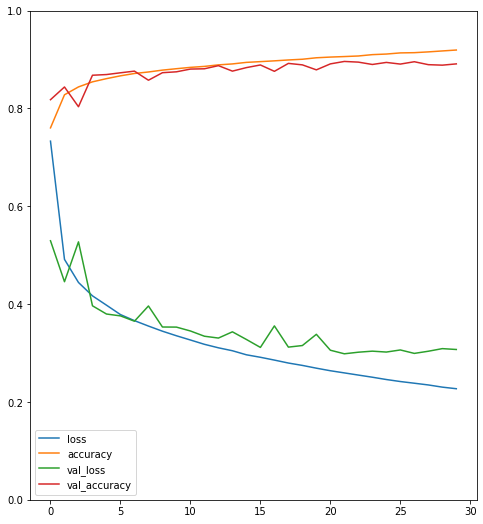

In [23]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,9))
plt.grid=True
plt.gca().set_ylim(0,1)
plt.show()

# evaluation

In [25]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3373 - accuracy: 0.8814


[0.3372744917869568, 0.8813999891281128]

In [28]:
x_new=x_test[:3]

In [32]:
yprob=model.predict(x_new)
yprob.round(2)

1/1 [==============================] - 0s 26ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.02, 0.  , 0.94],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [1]:
pd.DataFrame(model_history.history).plot(figsize=(12,8)

SyntaxError: unexpected EOF while parsing (3906518423.py, line 1)